# LSTM과 CNN을 조합해 영화리뷰 분류

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
# seed 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

#### IMDB 리뷰 불러오기

In [4]:
from keras.datasets import imdb

In [5]:
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=5000)

print(X_train)
print(type(X_train))
print(X_train.shape)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


#### 단어 길이 맞춰주기

In [6]:
from keras_preprocessing import sequence

In [7]:
x_train = sequence.pad_sequences(X_train,maxlen=100) # 길이 100 맞추고 빈칸은 0
x_test = sequence.pad_sequences(X_test,maxlen=100)

print(x_train)
print(type(x_train))
print(x_train.shape)

[[1415   33    6 ...   19  178   32]
 [ 163   11 3215 ...   16  145   95]
 [1301    4 1873 ...    7  129  113]
 ...
 [  11    6 4065 ...    4 3586    2]
 [ 100 2198    8 ...   12    9   23]
 [  78 1099   17 ...  204  131    9]]
<class 'numpy.ndarray'>
(25000, 100)


#### 모델 설계 및 학습

In [8]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding,Dropout,Activation
from keras.layers import Conv1D,MaxPooling1D

In [9]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
dense (Dense)                (None, None, 1)           65        
Total params: 532,129
Trainable params: 532,129
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

hist = model.fit(x_train,y_train,epochs=5,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/5
250/250 [==============================] - 11s 13ms/step - loss: 0.6657 - accuracy: 0.5840 - val_loss: 0.6228 - val_accuracy: 0.6447
Epoch 2/5
250/250 [==============================] - 3s 13ms/step - loss: 0.6143 - accuracy: 0.6540 - val_loss: 0.6201 - val_accuracy: 0.6464
Epoch 3/5
250/250 [==============================] - 3s 12ms/step - loss: 0.6059 - accuracy: 0.6631 - val_loss: 0.6181 - val_accuracy: 0.6480
Epoch 4/5
250/250 [==============================] - 3s 13ms/step - loss: 0.6016 - accuracy: 0.6660 - val_loss: 0.6178 - val_accuracy: 0.6476
Epoch 5/5
250/250 [==============================] - 3s 13ms/step - loss: 0.5974 - accuracy: 0.6689 - val_loss: 0.6159 - val_accuracy: 0.6494


#### 모델 평가

In [11]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.6159 - accuracy: 0.6494


[0.6158612370491028, 0.6494064331054688]

## 모델 정확도 시각화

In [12]:
y_loss = hist.history['loss']
y_valloss = hist.history['val_loss']

x_len = np.arange(len(y_loss))

No handles with labels found to put in legend.


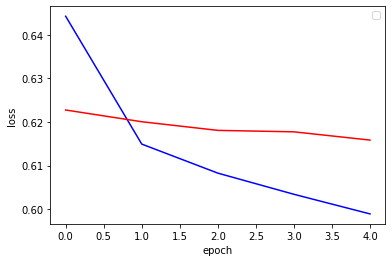

In [13]:
plt.plot(x_len,y_loss,c='blue')
plt.plot(x_len,y_valloss,c='red')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()